In [1]:
pip install --upgrade tensorflowimport os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflowimport (from versions: none)
ERROR: No matching distribution found for tensorflowimport


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install librosa soundfile

In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import soundfile as sf
from scipy import interpolate
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

from itertools import cycle


C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
 main_dir = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset'

In [ ]:
audio_data = []
file_names = []

In [ ]:
import os

# Define the paths
dataset_root = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset'
subdirs = ['train', 'test']
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through subdirectories (train and test)
for subdir in subdirs:
    subdir_path = os.path.join(dataset_root, subdir)
    categories = os.listdir(subdir_path)
    
    print(f"Contents of {subdir} folder:")
    for category in categories:
        if category in selected_categories: 
            category_path = os.path.join(subdir_path, category)
            if os.path.isdir(category_path):
                print(f"Category: {category}")
                
                audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]
                print(f"Audio files in {category} category:")
                for audio_file in audio_files:
                    print(audio_file)


Contents of train folder:
Category: day_1
Audio files in day_1 category:
WhatsApp Audio 2023-07-06 at 6.16.25 PM (1).ogg
WhatsApp Audio 2023-07-06 at 6.16.25 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.26 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.51 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.52 PM.ogg
WhatsApp Audio 2023-07-06 at 6.48.00 PM.ogg
WhatsApp Audio 2023-07-06 at 6.49.41 PM.ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM (2).ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM.ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (2).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (3).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (4).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (5).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (6).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (7).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM.ogg
WhatsApp Audio 2023-09-01 at 12.14.54 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.14.

# Data Augmentation

In [9]:
import os
import numpy as np
import soundfile as sf
from scipy import interpolate
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to perform time stretching
def time_stretch(input_audio, stretch_factor):
    input_length = len(input_audio)
    output_length = int(input_length * stretch_factor)
    
    # Create a time axis 
    time_axis = np.arange(input_length)
    
    # Create a time axis for the stretched audio
    stretched_time_axis = np.linspace(0, input_length - 1, output_length)
    
    # Create an interpolation function
    interpolator = interpolate.interp1d(time_axis, input_audio, kind='linear', fill_value='extrapolate')
    
    # Perform interpolation to compress time
    stretched_audio = interpolator(stretched_time_axis)
    
    return stretched_audio

data_dir = r'C:\Users\Lakshmi\Desktop\Main project\audio_dataset'
output_dir = r'C:\Users\Lakshmi\Desktop\Main project\augmented_audio'

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Stretch factors to apply (0.8 for compression, 1.2 for stretching)
stretch_factors = [0.8, 1.2]

# Loop through directories
for data_split in [train_dir, test_dir]:
    for category in os.listdir(data_split):
        category_dir = os.path.join(data_split, category)
        output_category_dir = os.path.join(output_dir, os.path.basename(data_split), category)
        
        # Create output directories if they don't exist
        os.makedirs(output_category_dir, exist_ok=True)
        
        # Loop through audio files
        for audio_file in tqdm(os.listdir(category_dir)):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(category_dir, audio_file)
                output_audio_path_base = os.path.join(output_category_dir, os.path.splitext(audio_file)[0])
                
                # Load the audio file
                audio_data, sr = sf.read(audio_path)
                
                # Apply time stretching for each factor
                for stretch_factor in stretch_factors:
                    stretched_audio = time_stretch(audio_data, stretch_factor)
                    output_audio_path = f'{output_audio_path_base}_stretch_{stretch_factor:.2f}.ogg'
                    sf.write(output_audio_path, stretched_audio, sr)

print("Augmentation complete!")



100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:04<00:00, 12.40it/s]

Augmentation complete!


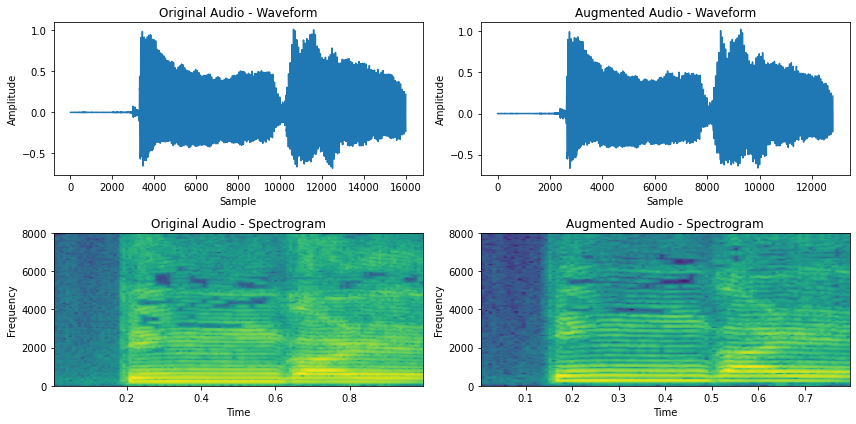

Original Audio:


Augmented Audio:


In [10]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the original and augmented audio
original_audio_path = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset/test/day_1/WhatsApp Ptt 2023-08-05 at 6.31.18 PM.ogg'
augmented_audio_path = 'C:/Users/Lakshmi/Desktop/Main project/augmented_audio/test/day_1/WhatsApp Ptt 2023-08-05 at 6.31.18 PM_stretch_0.80.ogg'

original_audio, sr_original = sf.read(original_audio_path)
augmented_audio, sr_augmented = sf.read(augmented_audio_path)

# Plot waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("Augmented Audio - Waveform")
plt.plot(augmented_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(augmented_audio, Fs=sr_augmented)
plt.title("Augmented Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("Augmented Audio:")
ipd.display(ipd.Audio(augmented_audio, rate=sr_augmented))


# Amplitude Normalisation

In [11]:
import os
import soundfile as sf
import numpy as np

augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\augmented_audio'
normalized_augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\normalized_augmented_audio'

# Create the new directory for normalized augmented files
os.makedirs(normalized_augmented_dir, exist_ok=True)

# Iterate through the augmented audio files
for data_split in os.listdir(augmented_dir):
    data_split_dir = os.path.join(augmented_dir, data_split)
    normalized_data_split_dir = os.path.join(normalized_augmented_dir, data_split)
    
    os.makedirs(normalized_data_split_dir, exist_ok=True)
    
    for category in os.listdir(data_split_dir):
        category_dir = os.path.join(data_split_dir, category)
        normalized_category_dir = os.path.join(normalized_data_split_dir, category)
        
        # Create the directory for the normalized category
        os.makedirs(normalized_category_dir, exist_ok=True)
        
        for augmented_file in os.listdir(category_dir):
            if augmented_file.endswith('.ogg'):
                augmented_audio_path = os.path.join(category_dir, augmented_file)
                normalized_audio_path = os.path.join(normalized_category_dir, augmented_file)
                
                # Load the augmented audio file
                augmented_audio, sr_augmented = sf.read(augmented_audio_path)
                
                # Normalize audio amplitudes
                normalized_audio = augmented_audio / np.max(np.abs(augmented_audio))
                
                # Save the normalized audio to the new directory
                sf.write(normalized_audio_path, normalized_audio, sr_augmented)

print("Amplitude normalization Completed and saving normalized augmented files!")


Amplitude normalization Completed and saving normalized augmented files!


In [ ]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the original and augmented audio
original_audio_path = 'audio_dataset/test/day_6/WhatsApp Ptt 2023-08-18 at 9.50.02 AM.ogg'
normalised_audio_path = 'normalized_augmented_audio/test/day_6/WhatsApp Ptt 2023-08-18 at 9.50.02 AM_stretch_1.20.ogg'

original_audio, sr_original = sf.read(original_audio_path)
normalised_audio, sr_normalised = sf.read(normalised_audio_path)

# Plot waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Augmented Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("Normalise Audio - Waveform")
plt.plot(normalised_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Augmented Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(normalised_audio, Fs=sr_normalised)
plt.title("Normalised Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Augmented Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("Normalised Audio:")
ipd.display(ipd.Audio(normalised_audio, rate=sr_normalised))

# Spectral Reduction

In [13]:
import os
import soundfile as sf
import numpy as np
import librosa


normalized_augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\normalized_augmented_audio'
spectral_reduced_dir = r'C:\Users\Lakshmi\Desktop\Main project\spectral_reduced_audio'

# Create the new directory for spectral reduced files
os.makedirs(spectral_reduced_dir, exist_ok=True)

# Iterate through the normalized augmented audio files
for data_split in os.listdir(normalized_augmented_dir):
    data_split_dir = os.path.join(normalized_augmented_dir, data_split)
    spectral_reduced_data_split_dir = os.path.join(spectral_reduced_dir, data_split)
    
    # Create the directory for the spectral reduced data split
    os.makedirs(spectral_reduced_data_split_dir, exist_ok=True)
    
    for category in os.listdir(data_split_dir):
        category_dir = os.path.join(data_split_dir, category)
        spectral_reduced_category_dir = os.path.join(spectral_reduced_data_split_dir, category)
        
        # Create the directory for the spectral reduced category
        os.makedirs(spectral_reduced_category_dir, exist_ok=True)
        
        for normalized_file in os.listdir(category_dir):
            if normalized_file.endswith('.ogg'):
                normalized_audio_path = os.path.join(category_dir, normalized_file)
                spectral_reduced_audio_path = os.path.join(spectral_reduced_category_dir, normalized_file)
                
                # Load the normalized audio file
                normalized_audio, sr_normalized = sf.read(normalized_audio_path)
                
                # Apply spectral reduction
                spectral_reduced_audio = librosa.effects.percussive(normalized_audio)
                
                # Save the spectral reduced audio to the new directory
                sf.write(spectral_reduced_audio_path, spectral_reduced_audio, sr_normalized)

print("Spectral reduction and saving spectral reduced files complete!")


Spectral reduction and saving spectral reduced files complete!


Original Audio:


Cleaned Audio:


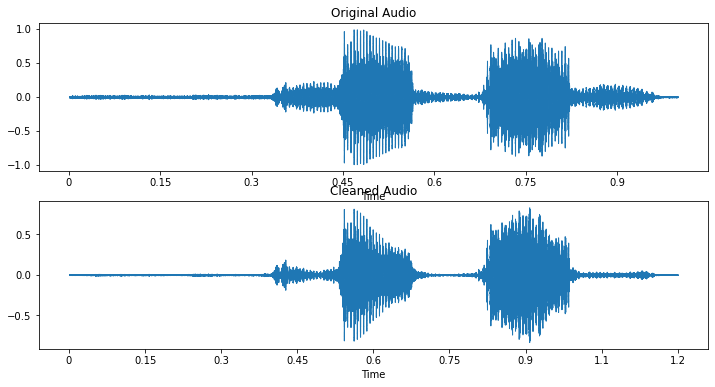

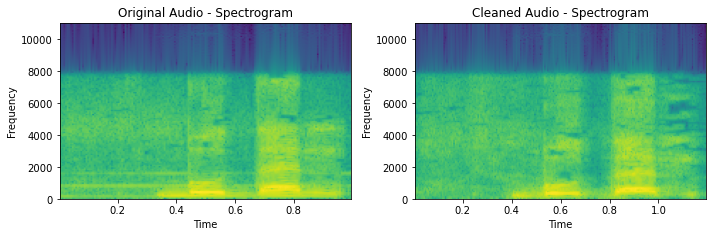

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

spec_path = 'spectral_reduced_audio/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM_stretch_1.20.ogg'
original_path = 'audio_dataset/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM.ogg'

y1, sr = librosa.load(original_path)
y2, sr = librosa.load(spec_path)

# Plot the original and cleaned audio signals
plt.figure(figsize=(12, 6))

# Display and play original audio
print("Original Audio:")
display(Audio(y1, rate=sr))


# Display and play cleaned audio
print("Cleaned Audio:")
display(Audio(y2, rate=sr))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y1, sr=sr)
plt.title('Original Audio')


plt.subplot(2, 1, 2)
librosa.display.waveshow(y2, sr=sr)
plt.title('Cleaned Audio')

# Plot the original and cleaned audio signals
plt.figure(figsize=(10, 6))

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(y1, Fs=sr)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(y2, Fs=sr)
plt.title("Cleaned Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
